# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_api_key

'c81188e0db06fa500ede717898dd759b'

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities


['lavrentiya',
 'punta arenas',
 'rock sound',
 'coffs harbour',
 'bolungarvik',
 'east london',
 'barrow',
 'kundiawa',
 'ngunguru',
 'acapulco',
 'berlevag',
 'moanda',
 'aksarka',
 'qaanaaq',
 'rikitea',
 'new norfolk',
 'carnarvon',
 'ruteng',
 'port elizabeth',
 'turukhansk',
 'ushuaia',
 'bambous virieux',
 'santa fe',
 'albany',
 'north bend',
 'poum',
 'mandalgovi',
 'nantucket',
 'taolanaro',
 'castro',
 'deputatskiy',
 'darhan',
 'kodiak',
 'waingapu',
 'kegayli',
 'kjollefjord',
 'omboue',
 'nacozari',
 'chuy',
 'illoqqortoormiut',
 'mahebourg',
 'hobyo',
 'busselton',
 'yellowknife',
 'meulaboh',
 'mataura',
 'ribeira grande',
 'palabuhanratu',
 'hermanus',
 'vestmanna',
 'vaini',
 'tasiilaq',
 'torbay',
 'cayenne',
 'itarema',
 'tigre',
 'jamestown',
 'souillac',
 'amderma',
 'kuloy',
 'cape town',
 'fortuna',
 'grand river south east',
 'mayo',
 'florianopolis',
 'champerico',
 'nizhniy kuranakh',
 'saint anthony',
 'kapaa',
 'acajutla',
 'sao filipe',
 'oktyabrskiy',
 'b

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [67]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperal"
# Build query URL

response = []
# Get the temperature from the response

lat = []
long = []
max_temp = []
humidity = []
wind = []
clouds = []
country = []
date = []
city_name = []
# Loop through the list of cities and perform a request for data on each
query_url = f"{url}appid={weather_api_key}&units={units}&q="
for i,city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print("The city name is: " + str(i) + "," + city)
    except:
        print("city not found")
    

The city name is: 0,lavrentiya
The city name is: 1,punta arenas
The city name is: 2,rock sound
The city name is: 3,coffs harbour
city not found
The city name is: 5,east london
The city name is: 6,barrow
The city name is: 7,kundiawa
The city name is: 8,ngunguru
The city name is: 9,acapulco
The city name is: 10,berlevag
The city name is: 11,moanda
The city name is: 12,aksarka
The city name is: 13,qaanaaq
The city name is: 14,rikitea
The city name is: 15,new norfolk
The city name is: 16,carnarvon
The city name is: 17,ruteng
The city name is: 18,port elizabeth
The city name is: 19,turukhansk
The city name is: 20,ushuaia
The city name is: 21,bambous virieux
The city name is: 22,santa fe
The city name is: 23,albany
The city name is: 24,north bend
The city name is: 25,poum
The city name is: 26,mandalgovi
The city name is: 27,nantucket
city not found
The city name is: 29,castro
The city name is: 30,deputatskiy
The city name is: 31,darhan
The city name is: 32,kodiak
The city name is: 33,waingap

The city name is: 275,harsin
The city name is: 276,kara-tyube
The city name is: 277,maumere
The city name is: 278,portel
The city name is: 279,constitucion
The city name is: 280,katsuura
The city name is: 281,evensk
The city name is: 282,saurimo
The city name is: 283,korla
The city name is: 284,sola
The city name is: 285,warmbad
The city name is: 286,aasiaat
The city name is: 287,shingu
The city name is: 288,elizabeth city
The city name is: 289,leh
city not found
The city name is: 291,coquimbo
The city name is: 292,kuusamo
The city name is: 293,port hedland
The city name is: 294,esmeraldas
The city name is: 295,arraial do cabo
The city name is: 296,gat
The city name is: 297,georgetown
The city name is: 298,nikolskoye
The city name is: 299,isangel
city not found
The city name is: 301,sabang
The city name is: 302,dwarka
The city name is: 303,gamba
The city name is: 304,jimenez
The city name is: 305,egvekinot
The city name is: 306,hami
The city name is: 307,teya
The city name is: 308,mata

The city name is: 546,balakhninskiy
The city name is: 547,hofn
city not found
The city name is: 549,innisfail
The city name is: 550,nizhnekamsk
The city name is: 551,zhangye
The city name is: 552,rapid valley
The city name is: 553,kamenka
The city name is: 554,road town
The city name is: 555,dunmore east
The city name is: 556,batemans bay
The city name is: 557,macomb
The city name is: 558,rawson
The city name is: 559,avera
The city name is: 560,sao sebastiao
The city name is: 561,tsurib
The city name is: 562,qarqin
The city name is: 563,cape coast
The city name is: 564,marabba
The city name is: 565,araguacu
The city name is: 566,khani
The city name is: 567,maltahohe
city not found
The city name is: 569,ishigaki
The city name is: 570,bayangol
city not found
The city name is: 572,yatou
The city name is: 573,ranau
The city name is: 574,palimbang
The city name is: 575,bayan
The city name is: 576,gizo
The city name is: 577,clyde river
city not found
The city name is: 579,mitu
The city name 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
city_data_df = pd.DataFrame(list(zip( city_name, lat, long, max_temp, humidity, clouds, country, date, wind
                                     )), 
                            columns = ['City', 'Latitude', 'Longitude', 'Highest Temp', 'Humidity', 'Cloudiness', 'Country', 'Date', 'Wind (MPH)'])
city_data_df.head()
# export city data to .csv in working directory.
city_data_df.to_csv('city_weather_data.csv', index=False)


city_data_df.head(50)
# city_data_df.dtypes


,City,Latitude,Longitude,Highest Temp,Humidity,Cloudiness,Country,Date,Wind (MPH)
0,lavrentiya,65.58,-171.00,262.45,94,98,RU,1586479068,3.21
1,punta arenas,-53.15,-70.92,285.15,71,40,CL,1586479068,10.30
2,rock sound,24.90,-76.20,298.50,83,0,BS,1586479068,4.70
3,coffs harbour,-30.30,153.13,293.15,82,90,AU,1586479068,2.60
4,east london,-33.02,27.91,292.76,75,50,ZA,1586479069,4.75
5,barrow,71.29,-156.79,255.15,77,1,US,1586479069,6.20
6,kundiawa,-6.02,144.97,293.65,50,100,PG,1586479069,0.49
7,ngunguru,-35.62,174.50,294.26,53,2,NZ,1586479069,4.47
8,acapulco,16.86,-99.89,301.15,78,40,MX,1586479069,4.10
9,berlevag,70.86,29.09,268.88,95,96,NO,1586479069,9.54


In [121]:
temp_in_farenheit = ((city_data_df["Highest Temp"]-273)*9/5 + 32).apply(np.floor)
temp_in_farenheit
del city_data_df["Highest Temp"]
city_data_df["Highest Temp (F)"] = temp_in_farenheit
city_data_df


,City,Latitude,Longitude,Humidity,Cloudiness,Country,Date,Wind (MPH),Highest Temp (F)
0,lavrentiya,65.58,-171.00,94,98,RU,1586479068,3.21,13.0
1,punta arenas,-53.15,-70.92,71,40,CL,1586479068,10.30,53.0
2,rock sound,24.90,-76.20,83,0,BS,1586479068,4.70,77.0
3,coffs harbour,-30.30,153.13,82,90,AU,1586479068,2.60,68.0
4,east london,-33.02,27.91,75,50,ZA,1586479069,4.75,67.0
...,...,...,...,...,...,...,...,...,...
560,keti bandar,24.14,67.45,77,0,PK,1586479156,4.60,75.0
561,sorong,-0.88,131.25,65,33,ID,1586478971,2.62,84.0
562,merrill,45.18,-89.68,51,90,US,1586479156,5.10,37.0
563,ust-maya,60.42,134.53,87,97,RU,1586479156,0.53,34.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [162]:
%matplotlib inline
from sklearn import datasets

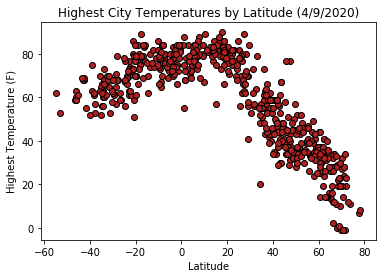

In [163]:
plt.scatter((city_data_df["Latitude"]),(city_data_df["Highest Temp (F)"]), marker="o", facecolors="firebrick", edgecolors="black")
plt.title("Highest City Temperatures by Latitude (4/9/2020)")
plt.xlabel("Latitude")
plt.ylabel("Highest Temperature (F)")
plt.savefig("../../02-Homework/06-Python-APIs/TempbyLatitude.png")


# Created a scatterplot showing temperatures in relation to their latitude. Obviously the closer to 
# the equator the warmer the temps and the further away the colder the temp
# 

#### Latitude vs. Humidity Plot

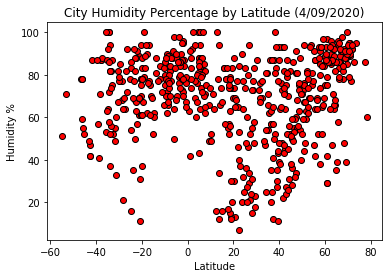

In [164]:
plt.scatter((city_data_df["Latitude"]),(city_data_df["Humidity"]), marker="o", facecolors="red", edgecolors="black")
plt.title("City Humidity Percentage by Latitude (4/09/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("../../02-Homework/06-Python-APIs/HumiditybyLatitude.png")

# created a scatterplot based on the humidity of a city in relation to it's latitude. 
# Latitude appears to have little effect on humidity

#### Latitude vs. Cloudiness Plot

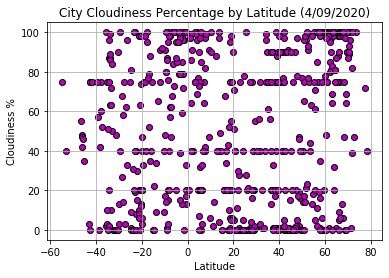

In [165]:
plt.scatter((city_data_df["Latitude"]),(city_data_df["Cloudiness"]), marker="o", facecolors="m", edgecolors="black")
plt.title("City Cloudiness Percentage by Latitude (4/09/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig("../../02-Homework/06-Python-APIs/CloudinessbyLatitude.png")

# created a scatterplot to show cloudiness based on lattitude of the city. Similar to humidity, 
# there does not seem to be a clear corelation between latitude and cloudiness

#### Latitude vs. Wind Speed Plot

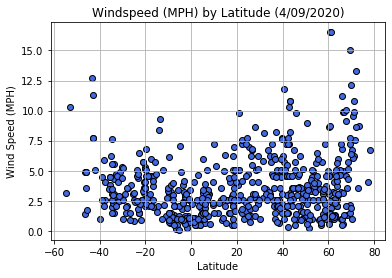

In [166]:
plt.scatter((city_data_df["Latitude"]),(city_data_df["Wind (MPH)"]), marker="o", facecolors="royalblue", edgecolors="black")
plt.title("Windspeed (MPH) by Latitude (4/09/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.savefig("../../02-Homework/06-Python-APIs/WindbyLatitude.png")

# created a scatterplot demonstratiing windpseed in relation to latitude of city. 
# There does not seem to be a clear corelation between windspeed and latitude.

## Linear Regression

In [167]:
# OPTIONAL: Create a function to create Linear Regression plots
N_Hem_df = city_data_df.loc[city_data_df["Latitude"]>=0]
N_Hem_df


,City,Latitude,Longitude,Humidity,Cloudiness,Country,Date,Wind (MPH),Highest Temp (F)
0,lavrentiya,65.58,-171.00,94,98,RU,1586479068,3.21,13.0
2,rock sound,24.90,-76.20,83,0,BS,1586479068,4.70,77.0
5,barrow,71.29,-156.79,77,1,US,1586479069,6.20,-1.0
8,acapulco,16.86,-99.89,78,40,MX,1586479069,4.10,82.0
9,berlevag,70.86,29.09,95,96,NO,1586479069,9.54,24.0
...,...,...,...,...,...,...,...,...,...
558,markala,13.70,-6.07,12,100,ML,1586479156,1.07,83.0
559,portree,57.41,-6.19,88,100,GB,1586479156,2.68,49.0
560,keti bandar,24.14,67.45,77,0,PK,1586479156,4.60,75.0
562,merrill,45.18,-89.68,51,90,US,1586479156,5.10,37.0


In [168]:
# Create Northern and Southern Hemisphere DataFrames
S_Hem_df = city_data_df.loc[city_data_df["Latitude"]<=0]
S_Hem_df

,City,Latitude,Longitude,Humidity,Cloudiness,Country,Date,Wind (MPH),Highest Temp (F)
1,punta arenas,-53.15,-70.92,71,40,CL,1586479068,10.30,53.0
3,coffs harbour,-30.30,153.13,82,90,AU,1586479068,2.60,68.0
4,east london,-33.02,27.91,75,50,ZA,1586479069,4.75,67.0
6,kundiawa,-6.02,144.97,50,100,PG,1586479069,0.49,69.0
7,ngunguru,-35.62,174.50,53,2,NZ,1586479069,4.47,70.0
...,...,...,...,...,...,...,...,...,...
552,cap malheureux,-19.98,57.61,78,20,MU,1586479155,3.60,79.0
555,inverell,-29.78,151.12,85,100,AU,1586479156,5.24,68.0
556,autazes,-3.58,-59.13,98,100,BR,1586479156,0.94,74.0
561,sorong,-0.88,131.25,65,33,ID,1586478971,2.62,84.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9011280504119583


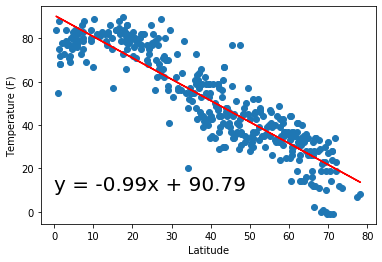

In [198]:
x_values = N_Hem_df['Latitude']
y_values = N_Hem_df['Highest Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()


# a scatterplot showing the regression of temperature based on latitude in the Northern Hemisphere. 
# As would be expected the further north a city is the colder it is.
# with an r-value of -9 it is very clear that there is a corelation between latitude and temperature

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6908456465543341


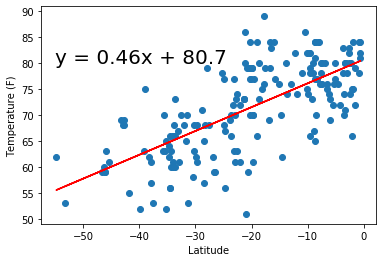

In [210]:
x_values = S_Hem_df['Latitude']
y_values = S_Hem_df['Highest Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
print(f"The r-squared is: {rvalue}")
plt.show()


# scatterplot showing the relationship betweeen temperature and latitude in the Southern Hemisphere. 
# Interestingly here the correlation is not as strong as it is in the Northern Hemisphere.
# the r-value here is .6, which is still a strong corelation, just not as strong as in the NOrthern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2092010232477554


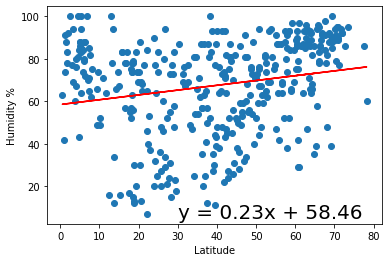

In [203]:
x_values = N_Hem_df['Latitude']
y_values = N_Hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,5),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()


# scatterplot showing humidity in relation to latitude in the Northern Hemisphere. 
# There is no strong corelation between latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2740312150496552


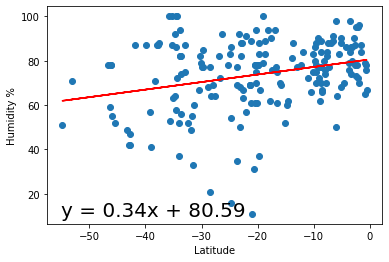

In [214]:
x_values = S_Hem_df['Latitude']
y_values = S_Hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue}")
plt.show()

# a scatterplot showing the relationship between humidity and latitude in the southern hemisphere.
# Similar to the Northern Hemisphere there is no strong corelation


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18054697922663995


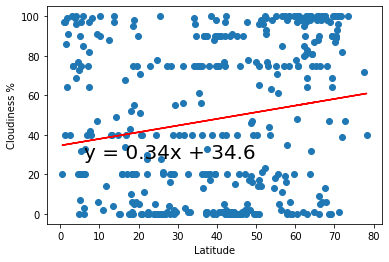

In [217]:
x_values = N_Hem_df['Latitude']
y_values = N_Hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,28),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-squared is: {rvalue}")
plt.show()


# scatterplot showing the relationship between cloudiness and latitude in the Northern Hemisphere
# There is no strong corelation between the two

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20916688923249055


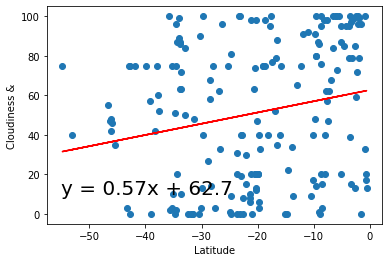

In [218]:
x_values = S_Hem_df['Latitude']
y_values = S_Hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness &')
print(f"The r-squared is: {rvalue}")
plt.show()

# scatterplot showing the relationship between cloudiness and latitude in the Southern Hemisphere
# There is no strong corelation between the two

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.26431757210491397


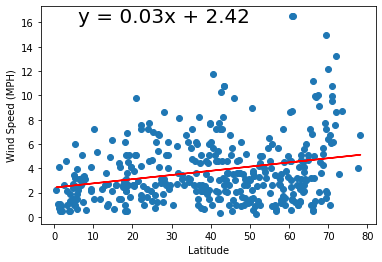

In [219]:
x_values = N_Hem_df['Latitude']
y_values = N_Hem_df['Wind (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,16),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue}")
plt.show()

# a scatterplot showing the relationship betweeen wind speed and latitude in the Northern Hemisphere
# There is no strong corelation between the two

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4198906567122227


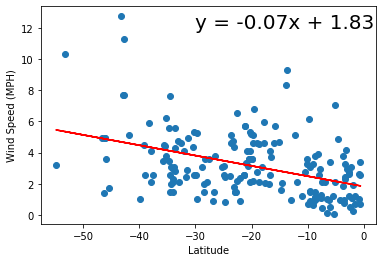

In [222]:
x_values = S_Hem_df['Latitude']
y_values = S_Hem_df['Wind (MPH)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=20,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue}")
plt.show()

# a scatterplot showing the relationship betweeen wind speed and latitude in the Southern Hemisphere
# There is no strong corelation between the two